In [5]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
# configuring the path of Kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

importing face mask dataset

In [7]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 162M/163M [00:08<00:00, 20.0MB/s]
100% 163M/163M [00:08<00:00, 19.4MB/s]


In [8]:
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("dataset is exrtacted")

dataset is exrtacted


In [9]:
!ls


data  face-mask-dataset.zip  kaggle.json  sample_data


Importing Dependencies

In [10]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split


In [11]:
with_mask_files=os.listdir("/content/data/with_mask")
print(with_mask_files[0:5])

['with_mask_1600.jpg', 'with_mask_1103.jpg', 'with_mask_604.jpg', 'with_mask_1823.jpg', 'with_mask_586.jpg']


In [12]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_3383.jpg', 'without_mask_576.jpg', 'without_mask_293.jpg', 'without_mask_350.jpg', 'without_mask_3452.jpg']


In [13]:
print("with mask =>",len(with_mask_files))
print("without mask =>",len(without_mask_files))

with mask => 3725
without mask => 3828


creating label for classifying

with mask-->1
without mask -->0

In [14]:
# create the labels

with_mask_labels = [1]*3725

without_mask_labels = [0]*3828

labels = with_mask_labels + without_mask_labels

print(len(labels))
print(labels[0:5])
print(labels[-5:])

7553
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


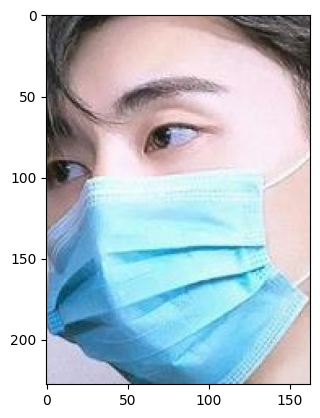

In [15]:
# displaying with mask image
img = mpimg.imread('/content/data/with_mask/with_mask_1545.jpg')
imgplot = plt.imshow(img)
plt.show()

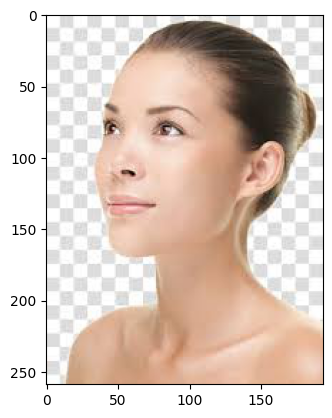

In [16]:
# displaying without mask image
img = mpimg.imread('/content/data/without_mask/without_mask_2925.jpg')
imgplot = plt.imshow(img)
plt.show()

image processing 
1. Resizing images for cnn
2.convert images into numpy arrays

In [17]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)



without_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(without_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [18]:
data[0]

array([[[255, 255, 255],
        [253, 253, 253],
        [242, 242, 243],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [253, 253, 253],
        [243, 243, 244],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [253, 253, 253],
        [244, 244, 245],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [237, 237, 237],
        [ 31,  32,  33],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]],

       [[255, 255, 255],
        [237, 237, 237],
        [ 32,  32,  33],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]],

       [[254, 254, 254],
        [238, 238, 238],
        [ 53,  53,  54],
        ...,
        [255, 255, 251],
        [255, 255, 253],
        [255, 255, 255]]

In [19]:
# converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)

(7553, 128, 128, 3) (6042, 128, 128, 3) (1511, 128, 128, 3)


In [21]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

Building a  Convolutional Neural Network

In [22]:
import tensorflow as tf
from tensorflow import keras

In [24]:
num_of_classes=2
model=keras.Sequential()
model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [25]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy"
              ,metrics=["acc"])

In [26]:
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 21ms/step - loss: 0.4096 - acc: 0.8288 - val_loss: 0.3082 - val_acc: 0.8760
Epoch 2/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2831 - acc: 0.8919 - val_loss: 0.2645 - val_acc: 0.8843
Epoch 3/5
170/170 [==============================] - 3s 19ms/step - loss: 0.2469 - acc: 0.9088 - val_loss: 0.2317 - val_acc: 0.9074
Epoch 4/5
170/170 [==============================] - 3s 19ms/step - loss: 0.1900 - acc: 0.9296 - val_loss: 0.2422 - val_acc: 0.9074
Epoch 5/5
170/170 [==============================] - 3s 17ms/step - loss: 0.1532 - acc: 0.9417 - val_loss: 0.2390 - val_acc: 0.9025


In [27]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 15ms/step - loss: 0.1978 - acc: 0.9252
Test Accuracy = 0.9252150654792786


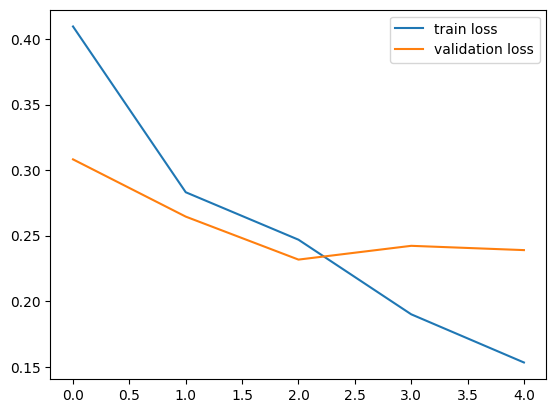

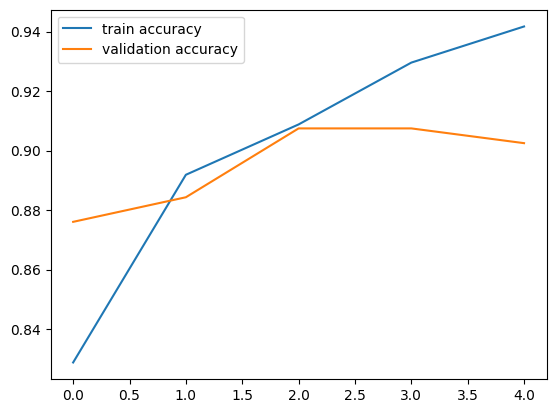

In [28]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

path of the image to be predicted/content/data/with_mask/with_mask_1071.jpg


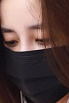

1/1 [==============================] - 0s 175ms/step
[[0.43672523 0.74891853]]
1
The person in the image is wearing a mask


In [31]:
input_image_path=input("path of the image to be predicted")

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)


input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction=model.predict(input_image_reshaped)

print(input_prediction)



input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')


path of the image to be predicted/content/data/without_mask/without_mask_1031.jpg


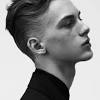

1/1 [==============================] - 0s 38ms/step
[[0.5281234 0.2886734]]
0
The person in the image is not wearing a mask


In [34]:
input_image_path=input("path of the image to be predicted")

input_image=cv2.imread(input_image_path)
cv2_imshow(input_image)


input_image_resized=cv2.resize(input_image,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])
input_prediction=model.predict(input_image_reshaped)

print(input_prediction)



input_pred_label = np.argmax(input_prediction)

print(input_pred_label)


if input_pred_label == 1:

  print('The person in the image is wearing a mask')

else:

  print('The person in the image is not wearing a mask')